In [120]:
from sst_bst import SSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [121]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
#import sys
#import numpy as np
#import matplotlib.pyplot as plt
#import h5py
#from os import listdir
#from os.path import isfile,join
#from time import sleep

In [122]:
sat_freq=[137.62,137.9,137.1,137.1]
sat_ids0=[25338,28654,33591,40069]

print("Sat freq (MHz):",sat_freq)

freqs=200-np.arange(512)/512*100
sat_band=np.array([np.argmin(np.abs(freqs-freq1)) for freq1 in sat_freq])
print("Sat bands:",sat_band)
bmin=np.min(sat_band)
bmax=np.max(sat_band)+1

Sat freq (MHz): [137.62, 137.9, 137.1, 137.1]
Sat bands: [319 318 322 322]


Timestep: 60s, nstep=1440
Timestep: 60s, nstep=1440
Timestep: 60s, nstep=1440
[array([ 433, 1119]), array([ 592,  692, 1284]), array([ 516, 1108]), array([ 433, 1021]), array([ 507, 1093]), array([ 680, 1272]), array([ 504, 1096]), array([ 413, 1001]), array([ 482, 1068]), array([ 668, 1260]), array([ 492, 1084]), array([393, 982])]


Text(0, 0.5, 'Alt (deg)')

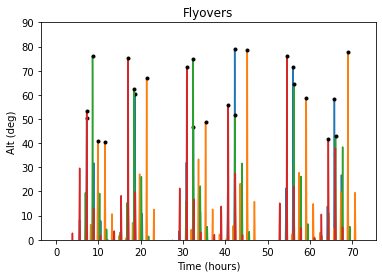

In [123]:
datestrs=['2022-11-18','2022-11-19','2022-11-20']
#SSTdate=datestr
#SSTdate='2022-10-16'
peak_idx=[]
peak_hrs=[]
for day,datestr in enumerate(datestrs):
 Dsat=np.load('CS1HBA0_'+datestr+'.npz')
 alts=Dsat['alts']
 azs=Dsat['azs']
 sat_names=Dsat['sat_names']
 Nsat=len(sat_names)
 Ntime=len(alts[0])
 Satstep=int(24*60*60/Ntime)
 print("Timestep: %is, nstep=%i"%(Satstep,Ntime))
 plt.gca().set_prop_cycle(None)
 for i in range(Nsat):
    alt=np.array(alts[i][:])
    grad=alt[1:]-alt[:-1]
    peak=(grad[:-1]>0)*(grad[1:]<0)*(alt[1:-1]>40)
    peak_index=np.compress(peak,np.array(range(len(peak))))+1
    peak_idx.append(peak_index)
    hrs=np.arange(len(alt))*Satstep/60/60+day*24
    peak_hrs.append(hrs[peak_index])
    plt.plot(hrs,alt)
    plt.plot(hrs[peak_index],alt[peak_index],'k.')
print(peak_idx)
plt.title("Flyovers")
plt.ylim(0,90)
plt.xlabel("Time (hours)")
plt.ylabel("Alt (deg)")

In [124]:
sst=SSTs('sst')


In [125]:
def P2dB(X): return 10*np.log10(X)
sis=range(8*3,12*3)

In [126]:
from datetime import timedelta;
peak_list=[]
for i,peaks in enumerate(peak_idx):
  for x,idx in enumerate(peaks):
    h=peak_hrs[i][x]
    tstart=datetime.fromisoformat("2022-11-18 00:00:00") 
    tend=tstart+timedelta(minutes=5)
    tstart+=timedelta(minutes=-5)
    tstart+=timedelta(hours=h)
    tend+=timedelta(hours=h)
    peak_list.append([i%4,tstart,tend])
    print(i,tstart,tend)

0 2022-11-18 07:08:00 2022-11-18 07:18:00
0 2022-11-18 18:34:00 2022-11-18 18:44:00
1 2022-11-18 09:47:00 2022-11-18 09:57:00
1 2022-11-18 11:27:00 2022-11-18 11:37:00
1 2022-11-18 21:19:00 2022-11-18 21:29:00
2 2022-11-18 08:31:00 2022-11-18 08:41:00
2 2022-11-18 18:23:00 2022-11-18 18:33:00
3 2022-11-18 07:08:00 2022-11-18 07:18:00
3 2022-11-18 16:56:00 2022-11-18 17:06:00
4 2022-11-19 08:22:00 2022-11-19 08:32:00
4 2022-11-19 18:08:00 2022-11-19 18:18:00
5 2022-11-19 11:15:00 2022-11-19 11:25:00
5 2022-11-19 21:07:00 2022-11-19 21:17:00
6 2022-11-19 08:19:00 2022-11-19 08:29:00
6 2022-11-19 18:11:00 2022-11-19 18:21:00
7 2022-11-19 06:48:00 2022-11-19 06:58:00
7 2022-11-19 16:36:00 2022-11-19 16:46:00
8 2022-11-20 07:57:00 2022-11-20 08:07:00
8 2022-11-20 17:43:00 2022-11-20 17:53:00
9 2022-11-20 11:03:00 2022-11-20 11:13:00
9 2022-11-20 20:55:00 2022-11-20 21:05:00
10 2022-11-20 08:07:00 2022-11-20 08:17:00
10 2022-11-20 17:59:00 2022-11-20 18:09:00
11 2022-11-20 06:28:00 2022-11-2

Load SST sst/SST_2022-11-18-18-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-18-20-19-21.h5
Load SST sst/SST_2022-11-18-21-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-18-18-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-18-16-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-19-08-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-19-17-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-19-10-19-21.h5
Load SST sst/SST_2022-11-19-11-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-19-20-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-19-07-19-21.h5
Load SST sst/SST_2022-11-19-08-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-19-17-19-21.h5
Load SST sst/SST_2022-11-19-18-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-19-06-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-19-16-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-20-07-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-20-17-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-20-10-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-20-20-19-21.h5
(200, 12)
Load SST sst/SST_2022-11-20-07-19-21.h5


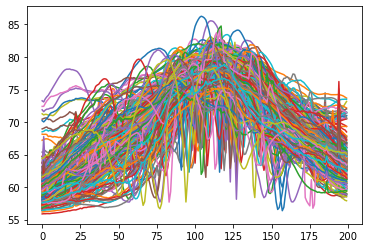

In [127]:
tstep=3 #3 second avg
sst_data=[]
for i,tstart,tend in peak_list:
    D=sst.getData(tstart,tend,sis,sat_band[i]) #second data
    if len(D)==0:
        sst_data.append(None)
        continue;
    n1,n2=D.shape
    na=n1//tstep
    D=np.mean(D[:na*tstep].reshape([na,tstep,n2]),axis=1)
    sst_data.append(D)
    print(D.shape)
    plt.plot(P2dB(D))

Sat name= NOAA 15 2022-11-18 07:08:01 2022-11-18 07:18:01 200
Sat name= NOAA 15 2022-11-18 18:34:01 2022-11-18 18:44:01 200
Sat name= NOAA 18 2022-11-18 09:47:01 2022-11-18 09:57:01 200
Sat name= NOAA 18 2022-11-18 11:27:01 2022-11-18 11:37:01 200
Sat name= NOAA 18 2022-11-18 21:19:01 2022-11-18 21:29:01 200
Sat name= NOAA 19 2022-11-18 08:31:01 2022-11-18 08:41:01 200
Sat name= NOAA 19 2022-11-18 18:23:01 2022-11-18 18:33:01 200
Sat name= METEOR-M 2 2022-11-18 07:08:01 2022-11-18 07:18:01 200
Sat name= METEOR-M 2 2022-11-18 16:56:01 2022-11-18 17:06:01 200
Sat name= NOAA 15 2022-11-19 08:22:01 2022-11-19 08:32:01 200
Sat name= NOAA 15 2022-11-19 18:08:01 2022-11-19 18:18:01 200
Sat name= NOAA 18 2022-11-19 11:15:01 2022-11-19 11:25:01 200
Sat name= NOAA 18 2022-11-19 21:07:01 2022-11-19 21:17:01 200
Sat name= NOAA 19 2022-11-19 08:19:01 2022-11-19 08:29:01 200
Sat name= NOAA 19 2022-11-19 18:11:01 2022-11-19 18:21:01 200
Sat name= METEOR-M 2 2022-11-19 06:48:01 2022-11-19 06:58:01 200

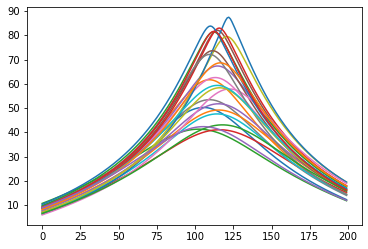

In [188]:
from sats import calcSat
from astropy.coordinates import EarthLocation
from astropy import units as u

LOFARloc=EarthLocation(lat=52.91161366*u.deg,lon=6.86862350*u.deg,height=50.165*u.m);#CS001_HBA0
peak_alts=[]
peak_azs=[]
for i,tstart,tend in peak_list:
    alt,az=calcSat(sat_ids0[i],LOFARloc,tstart+timedelta(seconds=1),tend+timedelta(seconds=1),tstep) 
    peak_alts.append(alt)
    peak_azs.append(az)
    plt.plot(alt)

(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)
(200, 12)


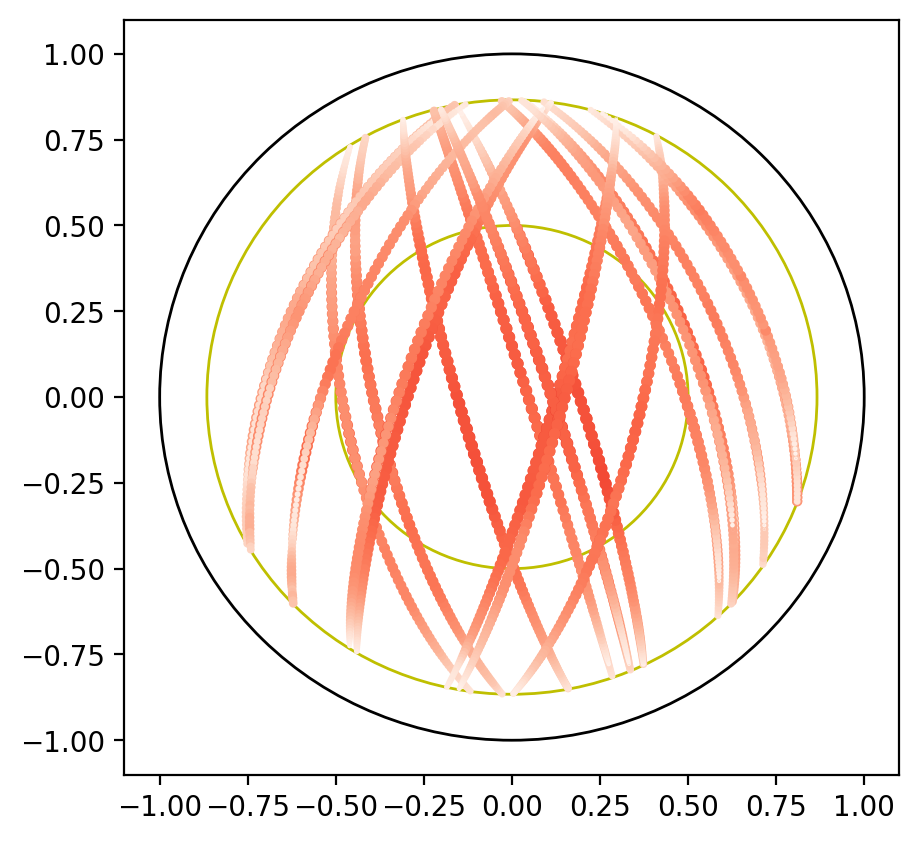

In [189]:
plt.figure(dpi=200,figsize=(5,5))
ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
ax.add_patch(plt.Circle((0, 0), 0.5, color='y',fill=False))
ax.add_patch(plt.Circle((0, 0), np.cos(30/180*np.pi), color='y',fill=False))
markers=['o','^','+','x','v','^']
for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=P2dB(sst_data[i])-70
    print(D2.shape)
    for hbat in [0,1]:
     mask=(alt>30/180*np.pi)*(D2[:,hbat]>0)
     X=np.compress(mask, np.cos(alt)*np.sin(az) )
     Y=np.compress(mask, np.cos(alt)*np.cos(az))
     z=np.compress(mask, D2[:,hbat])
     plt.scatter(X,Y,s=z,c=z,cmap='Reds',marker=markers[hbat//2],vmin=0,vmax=20)

/tmp/ipykernel_30281/211338985.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/211338985.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/211338985.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/211338985.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/211338985.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/211338985.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/211338985.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykerne

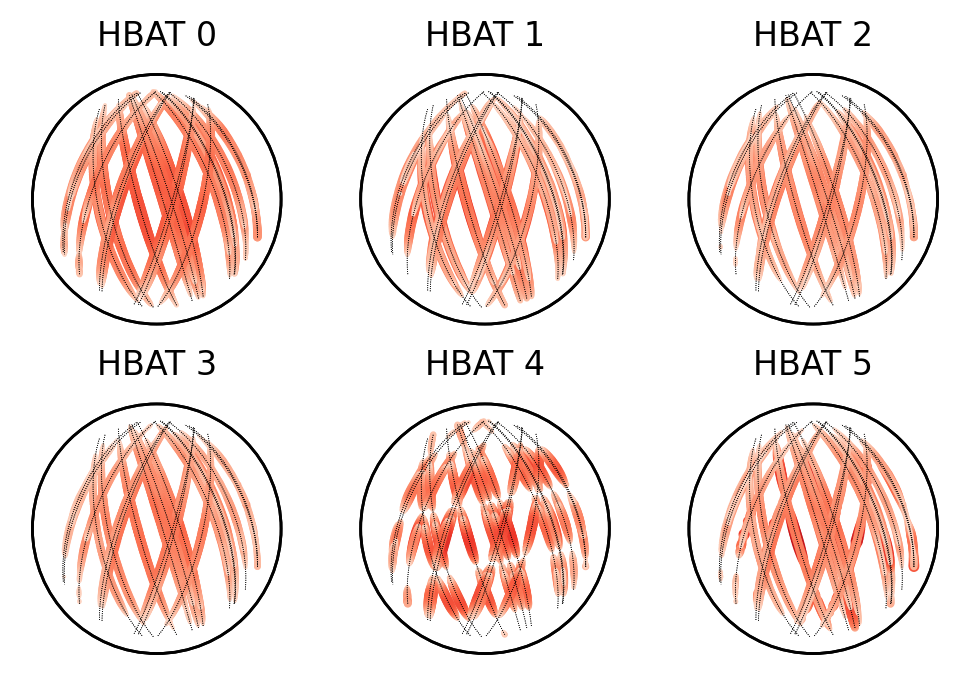

In [190]:
def XY(alt,az):
  X=np.cos(alt/180*np.pi)*np.sin(az/180*np.pi)
  Y=np.cos(alt/180*np.pi)*np.cos(az/180*np.pi)
  return X,Y

plt.figure(dpi=200,figsize=(6,4))
markers=['o','o']
for hbat in range(12):
  ax=plt.subplot(2, 3, hbat//2+1)
  ax = plt.gca()
  ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
  plt.axis('off')
  plt.title('HBAT %i'%(hbat//2))
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
for hbat in range(12):
  ax=plt.subplot(2, 3, hbat//2+1)
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=P2dB(sst_data[i])-70
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    X=np.compress(mask, X )
    Y=np.compress(mask, Y)
    z=np.compress(mask, D2[:,hbat])
    mask=(alt>10/180*np.pi)*(D2[:,hbat]>0)
    plt.scatter(X,Y,s=z-3,c=z,cmap='Reds',marker=markers[hbat%2],vmin=0,vmax=20)
plt.savefig("sats2.jpg")
#plot = plt.scatter(x, y, s= 10, c = z, cmap='coolwarm')

/tmp/ipykernel_30281/2998949525.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/2998949525.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/2998949525.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/2998949525.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/2998949525.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/2998949525.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/2998949525.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/i

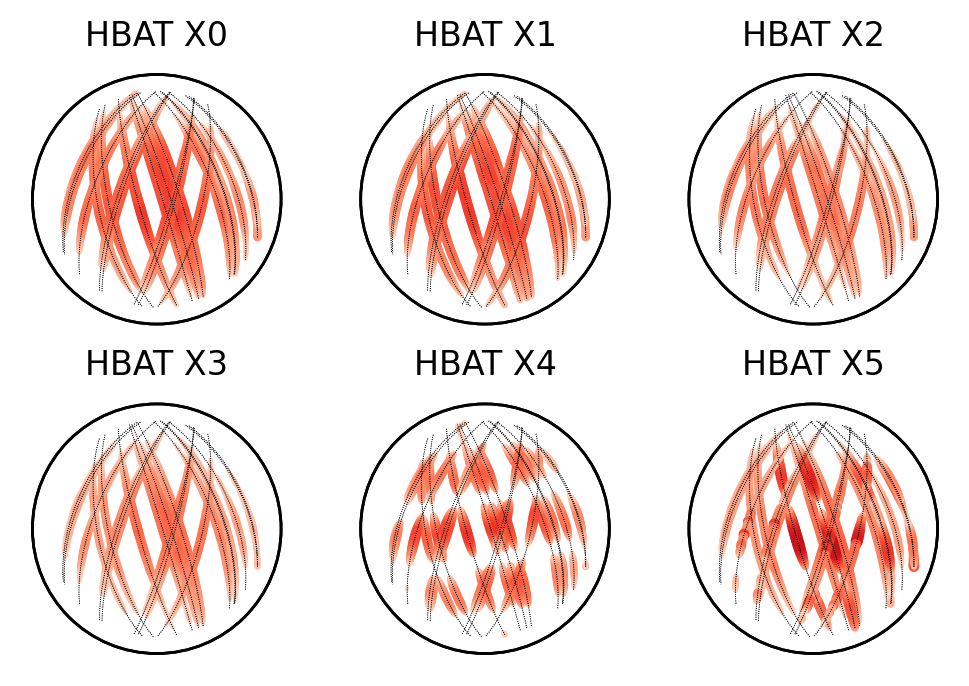

In [191]:
def XY(alt,az):
  X=np.cos(alt/180*np.pi)*np.sin(az/180*np.pi)
  Y=np.cos(alt/180*np.pi)*np.cos(az/180*np.pi)
  return X,Y

plt.figure(dpi=200,figsize=(6,4))
markers=['o','o']
for hbat in range(12):
  ax=plt.subplot(2, 3, hbat//2+1)
  ax = plt.gca()
  ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
  plt.axis('off')
  plt.title('HBAT X%i'%(hbat//2))
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
for hbat in range(6):
  ax=plt.subplot(2, 3, hbat+1)
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=P2dB(sst_data[i])-70
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    X=np.compress(mask, X )
    Y=np.compress(mask, Y)
    z=np.compress(mask, D2[:,2*hbat])
    mask=(alt>10/180*np.pi)*(D2[:,2*hbat]>0)
    plt.scatter(X,Y,s=z-3,c=z,cmap='Reds',marker='o',vmin=0,vmax=20)
plt.savefig("sats2.jpg")
#plot = plt.scatter(x, y, s= 10, c = z, cmap='coolwarm')

/tmp/ipykernel_30281/162115453.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/162115453.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/162115453.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/162115453.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/162115453.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/162115453.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykernel_30281/162115453.py:21: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
/tmp/ipykerne

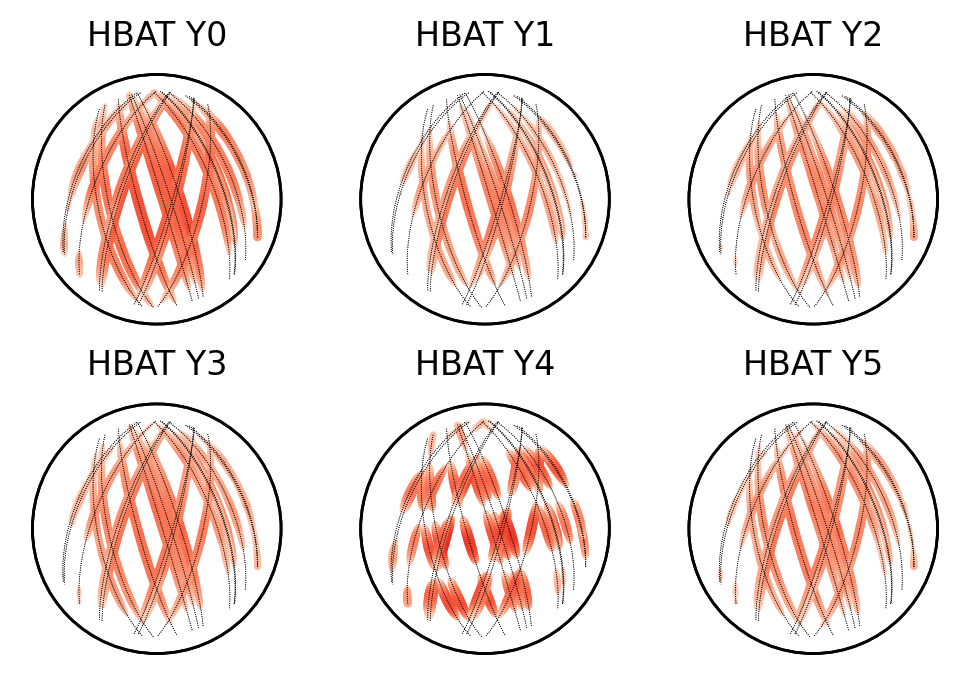

In [192]:
def XY(alt,az):
  X=np.cos(alt/180*np.pi)*np.sin(az/180*np.pi)
  Y=np.cos(alt/180*np.pi)*np.cos(az/180*np.pi)
  return X,Y

plt.figure(dpi=200,figsize=(6,4))
markers=['o','o']
for hbat in range(12):
  ax=plt.subplot(2, 3, hbat//2+1)
  ax = plt.gca()
  ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
  plt.axis('off')
  plt.title('HBAT Y%i'%(hbat//2))
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    plt.plot(X/mask,Y/mask,'k:',linewidth=0.3)
for hbat in range(6):
  ax=plt.subplot(2, 3, hbat+1)
  for i,info in enumerate(peak_list):
    if sst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=P2dB(sst_data[i])-70
    mask=(alt>30/180*np.pi)*1
    X=np.cos(alt)*np.sin(az)
    Y=np.cos(alt)*np.cos(az)
    X=np.compress(mask, X )
    Y=np.compress(mask, Y)
    z=np.compress(mask, D2[:,2*hbat+1])
    mask=(alt>10/180*np.pi)*(D2[:,2*hbat+1]>0)
    plt.scatter(X,Y,s=z-3,c=z,cmap='Reds',marker='o',vmin=0,vmax=20)
plt.savefig("sats2.jpg")
#plot = plt.scatter(x, y, s= 10, c = z, cmap='coolwarm')

In [193]:
from xsts import XSTs
xst1=XSTs("xst")

XST files= 335 , Bands= [318 319 320 321 322]


In [194]:
xst_data=[]
for i,tstart,tend in peak_list:
    D=xst1.GetBand(sat_band[i],tstart,tend,sis)
    print(D.shape)
    if len(D)==0:
        xst_data.append(None)
        continue;
    n1,n2,n3=D.shape
    na=n1//tstep
    D=np.mean(D[:na*tstep].reshape([na,tstep,n2,n3]),axis=1)
    xst_data.append(D)
    print(D.shape)

(0,)
Load XST xst/XST_SB319_2022-11-18-18-20-00.h5
(601, 12, 12)
(200, 12, 12)
(0,)
(0,)
Load XST xst/XST_SB318_2022-11-18-20-20-00.h5
Load XST xst/XST_SB318_2022-11-18-21-20-00.h5
(601, 12, 12)
(200, 12, 12)
(0,)
Load XST xst/XST_SB322_2022-11-18-18-20-00.h5
(601, 12, 12)
(200, 12, 12)
(0,)
Load XST xst/XST_SB322_2022-11-18-16-20-00.h5
(601, 12, 12)
(200, 12, 12)
Load XST xst/XST_SB319_2022-11-19-08-20-00.h5
(601, 12, 12)
(200, 12, 12)
Load XST xst/XST_SB319_2022-11-19-17-20-00.h5
(601, 12, 12)
(200, 12, 12)
Load XST xst/XST_SB318_2022-11-19-10-20-00.h5
Load XST xst/XST_SB318_2022-11-19-11-20-00.h5
(601, 12, 12)
(200, 12, 12)
Load XST xst/XST_SB318_2022-11-19-20-20-00.h5
(601, 12, 12)
(200, 12, 12)
Load XST xst/XST_SB322_2022-11-19-07-20-00.h5
Load XST xst/XST_SB322_2022-11-19-08-20-00.h5
(601, 12, 12)
(200, 12, 12)
Load XST xst/XST_SB322_2022-11-19-17-20-00.h5
Load XST xst/XST_SB322_2022-11-19-18-20-00.h5
(601, 12, 12)
(200, 12, 12)
Load XST xst/XST_SB322_2022-11-19-06-20-00.h5
(601,

Text(0.5, 1.0, 'XY angle')

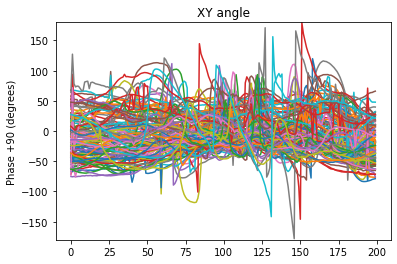

In [195]:
for D in xst_data:
    if D is None: continue;
    for hba in range(6):
        plt.plot(np.angle(D[:,2*hba+1,2*hba]*1j)/np.pi*180)
plt.ylim(-180,180);plt.ylabel("Phase +90 (degrees)")
plt.title("XY angle")

Text(0.5, 1.0, 'Phase (HBA X0 x HBA X1)')

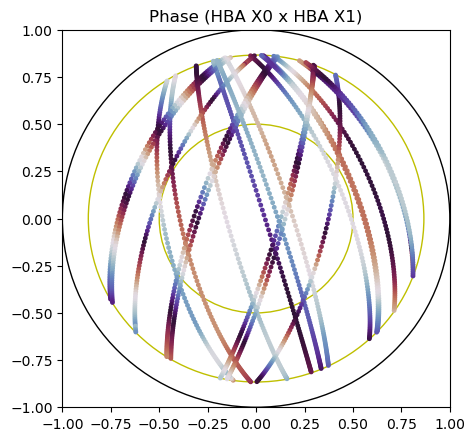

In [196]:
plt.figure(dpi=100,figsize=(5,5))
ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
ax.add_patch(plt.Circle((0, 0), 0.5, color='y',fill=False))
ax.add_patch(plt.Circle((0, 0), np.cos(30/180*np.pi), color='y',fill=False))
markers=['o','^','+','x','v','^']
for i,info in enumerate(peak_list):
    if xst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=np.angle(xst_data[i])/np.pi*180
#    print(D2.shape)
    for hbat in [0]:
     mask=(alt>30/180*np.pi)
     X=np.compress(mask, np.cos(alt)*np.sin(az) )
     Y=np.compress(mask, np.cos(alt)*np.cos(az))
     z=np.compress(mask, D2[:,2*hbat,2*hbat+2])
     plt.scatter(X,Y,s=6,c=z,cmap='twilight',marker=markers[hbat//2],vmin=-180,vmax=180)
#plt.colorbar()
plt.xlim(-1,1);plt.ylim(-1,1)
plt.title("Phase (HBA X0 x HBA X1)")

Text(0.5, 1.0, 'Phase (HBA X1 x HBA X2)')

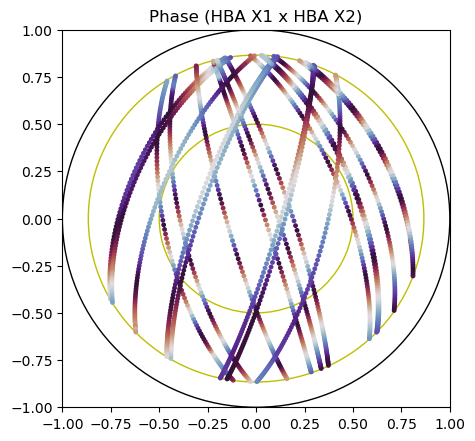

In [197]:
plt.figure(dpi=100,figsize=(5,5))
ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
ax.add_patch(plt.Circle((0, 0), 0.5, color='y',fill=False))
ax.add_patch(plt.Circle((0, 0), np.cos(30/180*np.pi), color='y',fill=False))
markers=['o','^','+','x','v','^']
for i,info in enumerate(peak_list):
    if xst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=np.angle(xst_data[i])/np.pi*180
#    print(D2.shape)
    for hbat in [0]:
     mask=(alt>30/180*np.pi)
     X=np.compress(mask, np.cos(alt)*np.sin(az) )
     Y=np.compress(mask, np.cos(alt)*np.cos(az))
     z=np.compress(mask, D2[:,2*hbat+2,2*hbat+4])
     plt.scatter(X,Y,s=6,c=z,cmap='twilight',marker=markers[hbat//2],vmin=-180,vmax=180)
#plt.colorbar()
plt.xlim(-1,1);plt.ylim(-1,1)
plt.title("Phase (HBA X1 x HBA X2)")

Text(0.5, 1.0, 'Phase (HBA X0 x HBA X2)')

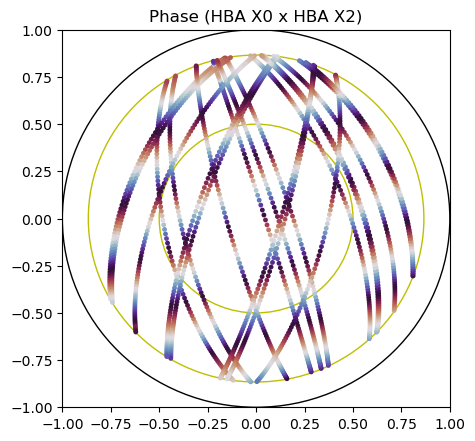

In [198]:
plt.figure(dpi=100,figsize=(5,5))
ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
ax.add_patch(plt.Circle((0, 0), 0.5, color='y',fill=False))
ax.add_patch(plt.Circle((0, 0), np.cos(30/180*np.pi), color='y',fill=False))
markers=['o','^','+','x','v','^']
for i,info in enumerate(peak_list):
    if xst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=np.angle(xst_data[i])/np.pi*180
#    print(D2.shape)
    for hbat in [0]:
     mask=(alt>30/180*np.pi)
     X=np.compress(mask, np.cos(alt)*np.sin(az) )
     Y=np.compress(mask, np.cos(alt)*np.cos(az))
     z=np.compress(mask, D2[:,2*hbat,2*hbat+4])
     plt.scatter(X,Y,s=6,c=z,cmap='twilight',marker=markers[hbat//2],vmin=-180,vmax=180)
#plt.colorbar()
plt.xlim(-1,1);plt.ylim(-1,1)
plt.title("Phase (HBA X0 x HBA X2)")

(103,) (103,) (103,)
(112,) (112,) (103,)
(107,) (107,) (103,)
(111,) (111,) (103,)
(89,) (89,) (103,)
(109,) (109,) (103,)
(96,) (96,) (103,)
(116,) (116,) (103,)
(113,) (113,) (103,)
(98,) (98,) (103,)
(109,) (109,) (103,)
(102,) (102,) (103,)
(106,) (106,) (103,)
(101,) (101,) (103,)
(106,) (106,) (103,)
(115,) (115,) (103,)
(110,) (110,) (103,)
(85,) (85,) (103,)
(111,) (111,) (103,)
(82,) (82,) (103,)


Text(0.5, 1.0, 'Phase (HBA X0 x HBA X1)')

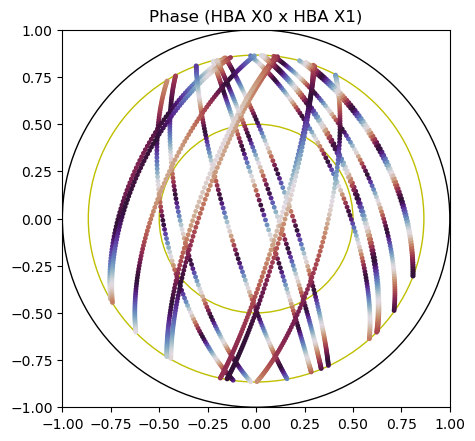

In [199]:
plt.figure(dpi=100,figsize=(5,5))
ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
ax.add_patch(plt.Circle((0, 0), 0.5, color='y',fill=False))
ax.add_patch(plt.Circle((0, 0), np.cos(30/180*np.pi), color='y',fill=False))
markers=['o','^','+','x','v','^']
for i,info in enumerate(peak_list):
    if xst_data[i] is None: continue;
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
    D2=np.angle(xst_data[i])/np.pi*180
#    print(D2.shape)
    for hbat in [0]:
     mask=(alt>30/180*np.pi)
     X=np.compress(mask, np.cos(alt)*np.sin(az) )
     Y=np.compress(mask, np.cos(alt)*np.cos(az))
#     z=np.compress(mask, D2[:,2*hbat,2*hbat+2])
     z=np.angle(np.exp(2j*np.pi*(X*X0+Y*Y0)))/np.pi*180
     print(X.shape,Y.shape,Z.shape)
     plt.scatter(X,Y,s=6,c=z,cmap='twilight',marker=markers[hbat//2],vmin=-180,vmax=180)
#plt.colorbar()
plt.xlim(-1,1);plt.ylim(-1,1)
plt.title("Phase (HBA X0 x HBA X1)")

Text(0.5, 1.0, 'Phase residual (HBA X0 x HBA X2)')

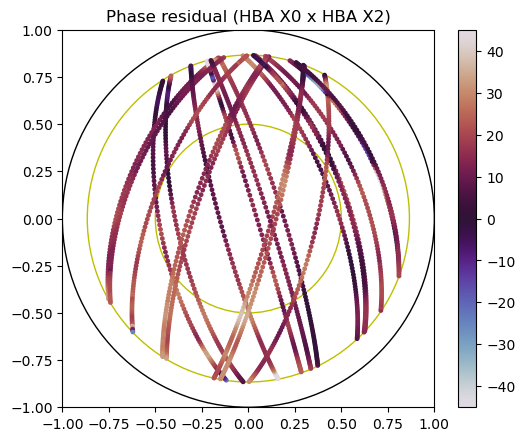

In [200]:
plt.figure(dpi=100,figsize=(6,5))
ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
ax.add_patch(plt.Circle((0, 0), 0.5, color='y',fill=False))
ax.add_patch(plt.Circle((0, 0), np.cos(30/180*np.pi), color='y',fill=False))
markers=['o','^','+','x','v','^']
for i,info in enumerate(peak_list):
    if xst_data[i] is None: continue;
    wavelength=300/sat_freq[info[0]]
    R=5.1*np.sqrt(2)/wavelength
    th=(45-24+90)/180*np.pi
    X0=R*np.cos(th)
    Y0=R*np.sin(th)
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
#    print(D2.shape)
    for hbat in [0]:
     D2=xst_data[i][:,2*hbat,2*hbat+4]
     mask=(alt>30/180*np.pi)
     X=np.compress(mask, np.cos(alt)*np.sin(az) )
     Y=np.compress(mask, np.cos(alt)*np.cos(az))
     z=np.compress(mask, D2)
     z=np.angle(z*np.exp(2j*np.pi*(X*X0+Y*Y0)))/np.pi*180
     plt.scatter(X,Y,s=6,c=z,cmap='twilight',marker=markers[hbat//2],vmin=-45,vmax=45)
plt.colorbar()
plt.xlim(-1,1);plt.ylim(-1,1)
plt.title("Phase residual (HBA X0 x HBA X2)")

Text(0.5, 1.0, 'Phase residual (HBA X0 x HBA X2)')

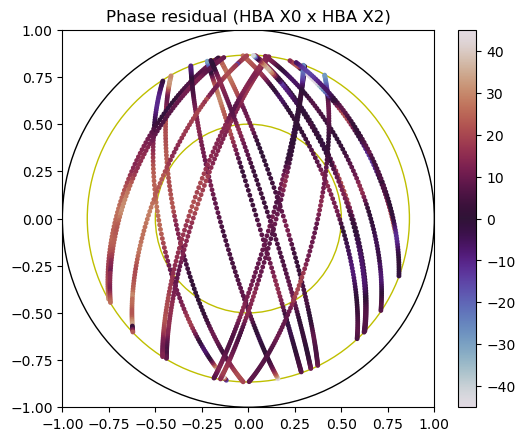

In [201]:
plt.figure(dpi=100,figsize=(6,5))
ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
ax.add_patch(plt.Circle((0, 0), 0.5, color='y',fill=False))
ax.add_patch(plt.Circle((0, 0), np.cos(30/180*np.pi), color='y',fill=False))
markers=['o','^','+','x','v','^']
for i,info in enumerate(peak_list):
    if xst_data[i] is None: continue;
    wavelength=300/sat_freq[info[0]]
    R=5.1*np.sqrt(2)/wavelength
    th=(45-24)/180*np.pi
    X0=R*np.cos(th)
    Y0=R*np.sin(th)
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
#    print(D2.shape)
    for hbat in [0]:
     D2=xst_data[i][:,2*hbat,2*hbat+2]
     mask=(alt>30/180*np.pi)
     X=np.compress(mask, np.cos(alt)*np.sin(az) )
     Y=np.compress(mask, np.cos(alt)*np.cos(az))
     z=np.compress(mask, D2)
     z=np.angle(z*np.exp(2j*np.pi*(X*X0+Y*Y0)))/np.pi*180
     plt.scatter(X,Y,s=6,c=z,cmap='twilight',marker=markers[hbat//2],vmin=-45,vmax=45)
plt.colorbar()
plt.xlim(-1,1);plt.ylim(-1,1)
plt.title("Phase residual (HBA X0 x HBA X2)")

Text(0.5, 1.0, 'Phase residual (HBA X0 x HBA X2)')

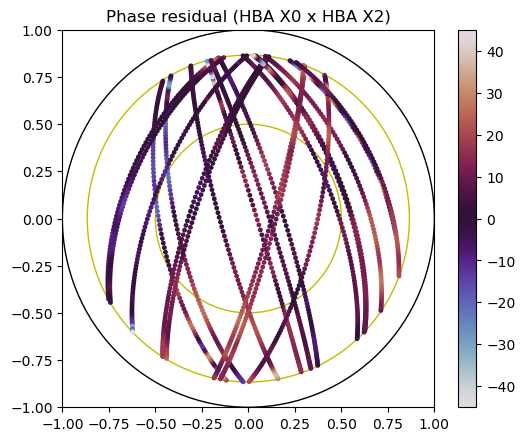

In [202]:
plt.figure(dpi=100,figsize=(6,5))
ax = plt.gca()
ax.add_patch(plt.Circle((0, 0), 1.0, color='k',fill=False))
ax.add_patch(plt.Circle((0, 0), 0.5, color='y',fill=False))
ax.add_patch(plt.Circle((0, 0), np.cos(30/180*np.pi), color='y',fill=False))
markers=['o','^','+','x','v','^']
for i,info in enumerate(peak_list):
    if xst_data[i] is None: continue;
    wavelength=300/sat_freq[info[0]]
    R=5.1*2/wavelength
    th=(180-24)/180*np.pi
    X0=R*np.cos(th)
    Y0=R*np.sin(th)
    az=np.array(peak_azs[i])/180*np.pi
    alt=np.array(peak_alts[i])/180*np.pi
#    print(D2.shape)
    for hbat in [0]:
     D2=xst_data[i][:,2*hbat+2,2*hbat+4]
     mask=(alt>30/180*np.pi)
     X=np.compress(mask, np.cos(alt)*np.sin(az) )
     Y=np.compress(mask, np.cos(alt)*np.cos(az))
     z=np.compress(mask, D2)
     z=np.angle(z*np.exp(2j*np.pi*(X*X0+Y*Y0)))/np.pi*180
     plt.scatter(X,Y,s=6,c=z,cmap='twilight',marker=markers[hbat//2],vmin=-45,vmax=45)
plt.colorbar()
plt.xlim(-1,1);plt.ylim(-1,1)
plt.title("Phase residual (HBA X0 x HBA X2)")

In [ ]:
0